<a href="https://colab.research.google.com/github/ytkidanu/ImageProcessing/blob/main/Cleaning_Dataset_and_Pre_model_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
pip install tensorflow tensorflow-datasets


In [ ]:
import tensorflow_datasets as tfds

# Load the PlantVillage dataset
dataset, info = tfds.load('plant_village', with_info=True, as_supervised=True)
full_dataset = dataset['train']

# Split the dataset into training and testing datasets


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.M1ZNGH_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.


#Cleaning Dataset

In [ ]:

# Load dataset metadata
_, info = tfds.load('plant_village', with_info=True)

# Print all label names
label_names = info.features['label'].names
print("Available class labels:")
for i, name in enumerate(label_names):
    print(f"{i}: {name}")

Available class labels:
0: Apple___Apple_scab
1: Apple___Black_rot
2: Apple___Cedar_apple_rust
3: Apple___healthy
4: Blueberry___healthy
5: Cherry___healthy
6: Cherry___Powdery_mildew
7: Corn___Cercospora_leaf_spot Gray_leaf_spot
8: Corn___Common_rust
9: Corn___healthy
10: Corn___Northern_Leaf_Blight
11: Grape___Black_rot
12: Grape___Esca_(Black_Measles)
13: Grape___healthy
14: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
15: Orange___Haunglongbing_(Citrus_greening)
16: Peach___Bacterial_spot
17: Peach___healthy
18: Pepper,_bell___Bacterial_spot
19: Pepper,_bell___healthy
20: Potato___Early_blight
21: Potato___healthy
22: Potato___Late_blight
23: Raspberry___healthy
24: Soybean___healthy
25: Squash___Powdery_mildew
26: Strawberry___healthy
27: Strawberry___Leaf_scorch
28: Tomato___Bacterial_spot
29: Tomato___Early_blight
30: Tomato___healthy
31: Tomato___Late_blight
32: Tomato___Leaf_Mold
33: Tomato___Septoria_leaf_spot
34: Tomato___Spider_mites Two-spotted_spider_mite
35: Tomato___Targe

In [ ]:
# Correct tomato class names from the dataset
tomato_classes = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___healthy',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]

# Get indices of tomato classes
tomato_label_indices = [label_names.index(name) for name in tomato_classes]

# Filter the dataset
def filter_tomato(img, label):
    return tf.reduce_any(tf.equal(label, tomato_label_indices))

tomato_dataset = full_dataset.filter(filter_tomato)

In [ ]:
tomato_dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

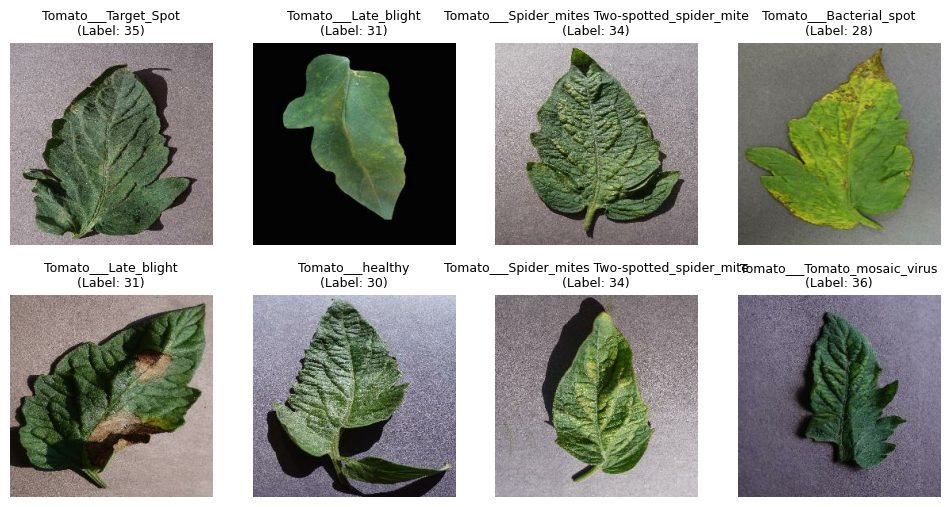

In [ ]:
import matplotlib.pyplot as plt

# Set label names from the original dataset
label_names = info.features['label'].names

# Preview some images from the filtered dataset
def show_tomato_batch(dataset):
    plt.figure(figsize=(12, 6))
    for i, (img, label) in enumerate(dataset.take(8)):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(img.numpy())
        class_name = label_names[label.numpy()]
        plt.title(f"{class_name}\n(Label: {label.numpy()})", fontsize=9)
        plt.axis("off")

# Show a batch of tomato images with class names
show_tomato_batch(tomato_dataset)

In [ ]:
import tensorflow as tf

# Initialize a set to store unique class labels
unique_classes = set()

# Iterate through the dataset and collect the unique class labels
for _, label in tomato_dataset:
    unique_classes.add(label.numpy())  # add the class label to the set

# Get the class labels as a list
unique_classes_list = sorted(list(unique_classes))

# Print out the unique class labels
print("Unique class labels in the tomato dataset:")
for label in unique_classes_list:
    print(label)

Unique class labels in the tomato dataset:
28
29
30
31
32
33
34
35
36
37


In [ ]:
# List of class names based on tomato diseases
label_names = [
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]

# Print the human-readable class names based on numeric indices
print("Class names present in the tomato dataset:")
for index in unique_classes_list:
    print(label_names[index - 28])

Class names present in the tomato dataset:
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
label_names = [
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]

# Iterate through the dataset and print out numeric label, class name, and image shape
for image, label in tomato_dataset.take(10):  # Take 5 samples for preview
    numeric_label = label.numpy()  # Numeric label from dataset
    class_name = label_names[numeric_label - 28]  # Adjust index for base value of 28
    print(f"Numeric Label: {numeric_label}")
    print(f"Class Label: {class_name}")
    print(f"Image Shape: {image.shape}\n")

Numeric Label: 35
Class Label: Tomato___Target_Spot
Image Shape: (256, 256, 3)

Numeric Label: 31
Class Label: Tomato___Late_blight
Image Shape: (256, 256, 3)

Numeric Label: 34
Class Label: Tomato___Spider_mites Two-spotted_spider_mite
Image Shape: (256, 256, 3)

Numeric Label: 28
Class Label: Tomato___Bacterial_spot
Image Shape: (256, 256, 3)

Numeric Label: 31
Class Label: Tomato___Late_blight
Image Shape: (256, 256, 3)

Numeric Label: 30
Class Label: Tomato___healthy
Image Shape: (256, 256, 3)

Numeric Label: 34
Class Label: Tomato___Spider_mites Two-spotted_spider_mite
Image Shape: (256, 256, 3)

Numeric Label: 36
Class Label: Tomato___Tomato_mosaic_virus
Image Shape: (256, 256, 3)

Numeric Label: 37
Class Label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image Shape: (256, 256, 3)

Numeric Label: 37
Class Label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image Shape: (256, 256, 3)



In [ ]:
# Get all numeric labels in the dataset
unique_labels = set()
for image, label in tomato_dataset:
    unique_labels.add(label.numpy())  # Add the numeric label to the set (set ensures uniqueness)

# Print unique labels
print(f"Unique numeric labels in the tomato dataset: {sorted(unique_labels)}")

# Also, print corresponding class names
print("\nClass names for the unique labels:")
for label in sorted(unique_labels):
    class_name = label_names[label - 28]  # Adjust for base index of 28
    print(f"Numeric Label: {label}, Class Label: {class_name}")

Unique numeric labels in the tomato dataset: [np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37)]

Class names for the unique labels:
Numeric Label: 28, Class Label: Tomato___Bacterial_spot
Numeric Label: 29, Class Label: Tomato___Early_blight
Numeric Label: 30, Class Label: Tomato___healthy
Numeric Label: 31, Class Label: Tomato___Late_blight
Numeric Label: 32, Class Label: Tomato___Leaf_Mold
Numeric Label: 33, Class Label: Tomato___Septoria_leaf_spot
Numeric Label: 34, Class Label: Tomato___Spider_mites Two-spotted_spider_mite
Numeric Label: 35, Class Label: Tomato___Target_Spot
Numeric Label: 36, Class Label: Tomato___Tomato_mosaic_virus
Numeric Label: 37, Class Label: Tomato___Tomato_Yellow_Leaf_Curl_Virus


#Graphics and Visualizations

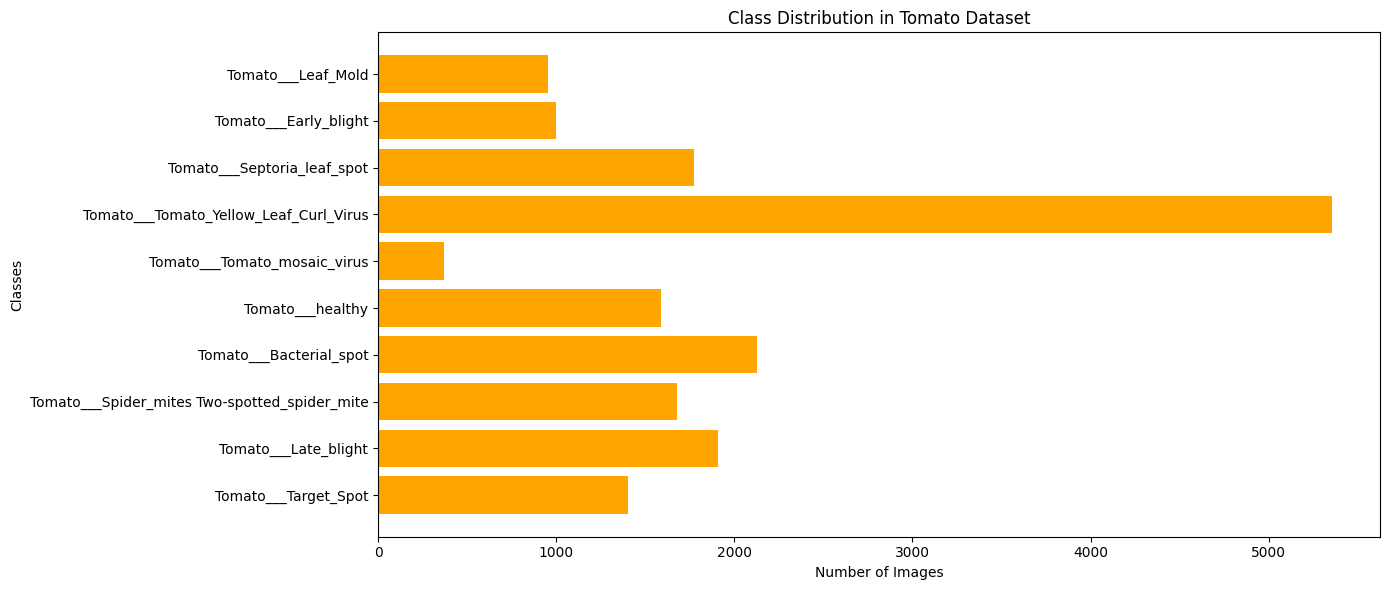

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import Counter

# Count the occurrences of each label in the dataset
class_counts = Counter()
for _, label in tomato_dataset:
    class_counts[label.numpy()] += 1

# List of class names based on tomato diseases
label_names = [
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]

# Prepare data for plotting
labels = [label_names[i - 28] for i in class_counts.keys()]  # Adjust for the base index of 28
counts = [class_counts[i] for i in class_counts.keys()]

# Plot class distribution
plt.figure(figsize=(14, 6))
plt.barh(labels, counts, color='orange')
plt.title("Class Distribution in Tomato Dataset")
plt.xlabel("Number of Images")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()

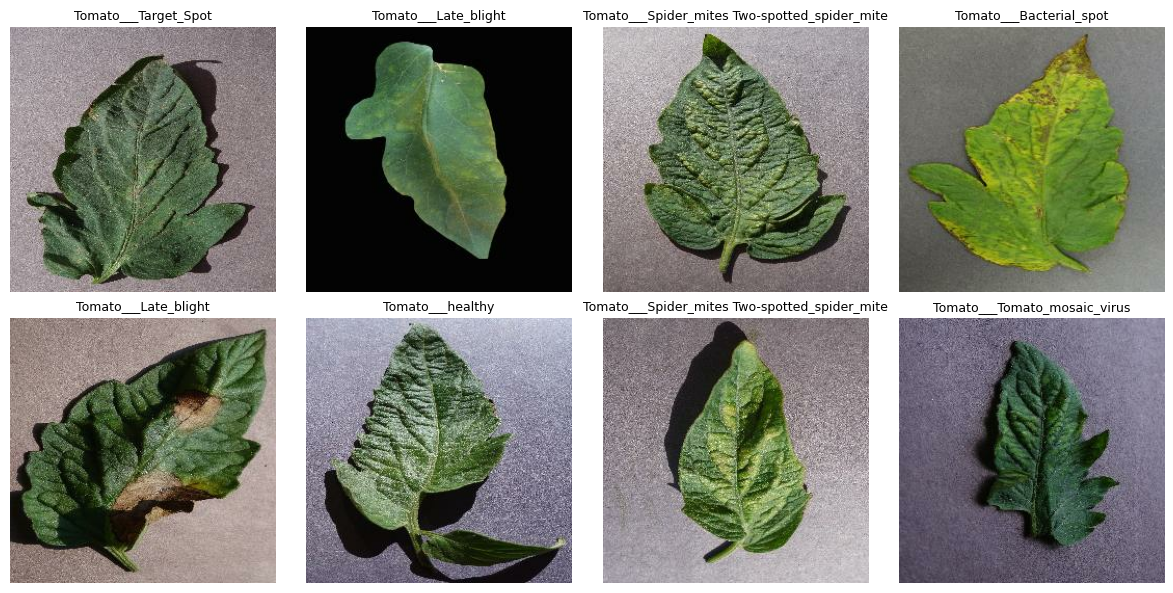

In [ ]:
import matplotlib.pyplot as plt

def show_sample_images(dataset, label_names, num=8):
    plt.figure(figsize=(12, 6))
    for i, (image, label) in enumerate(dataset.take(num)):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(image.numpy())
        plt.title(label_names[label.numpy() - 28], fontsize=9)  # Adjust index
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Display a sample batch of images
show_sample_images(tomato_dataset, label_names)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
full_dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# train_ds  = dataset['train']
# count(train_ds)
# test_ds = dataset['test']
# builder = tfds.builder('my_dataset')
# builder.info.splits['train'].num_examples  # 10_000
# builder.info.splits['train[:75%]'].num_examples  # 7_500 (also works with slices)
# builder.info.splits.keys()  # ['train', 'test']

# import tensorflow as tf
# import tensorflow_datasets as tfds

# builder = tfds.builder("plant_village")
# builder.download_and_prepare()
# ds_info = builder.info




In [ ]:
# for image, label in builder.take(3):  # Take the first 3 samples
#     print("Image shape:", image.shape)
#     print("Label:", label.numpy())

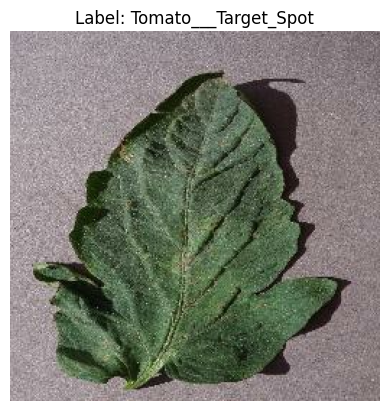

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

for i, (image, label) in enumerate(full_dataset.take(1)):  # Take the first 6 samples
    # Display image
    label_name = info.features['label'].int2str(label.numpy())
    plt.subplot(1, 1, i + 1)  # 1 row, 6 columns, current subplot
    plt.imshow(image.numpy())  # Convert tensor to numpy array for plotting
    plt.title(f"Label: {label_name}")  # Display the label as title
    plt.axis("off")  # Hide axes


# Show the plot
plt.show()



In [ ]:
plt.show()

# Collect all labels from the dataset
labels = [label for _, label in full_dataset]

# Convert the label indices to their corresponding label names
label_names = [info.features['label'].int2str(label) for label in labels]

label_counts = pd.Series(label_names).value_counts()
df = pd.DataFrame({'Labels': label_counts.index, 'Counts': label_counts.values})

print(df)

                                           Labels  Counts
0        Orange___Haunglongbing_(Citrus_greening)    5507
1          Tomato___Tomato_Yellow_Leaf_Curl_Virus    5357
2                               Soybean___healthy    5090
3                          Peach___Bacterial_spot    2297
4                         Tomato___Bacterial_spot    2127
5                            Tomato___Late_blight    1908
6                         Squash___Powdery_mildew    1835
7                     Tomato___Septoria_leaf_spot    1771
8   Tomato___Spider_mites Two-spotted_spider_mite    1676
9                                 Apple___healthy    1645
10                               Tomato___healthy    1591
11                            Blueberry___healthy    1502
12                         Pepper,_bell___healthy    1477
13                           Tomato___Target_Spot    1404
14                   Grape___Esca_(Black_Measles)    1383
15                             Corn___Common_rust    1192
16            

In [ ]:
#seed = 0518
# Split the dataset into training and testing subsets
#(train_ds, test_ds) = tfds.load("plant_village", split=["train[:80%]", "train[80%:]"], as_supervised=True)
